In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

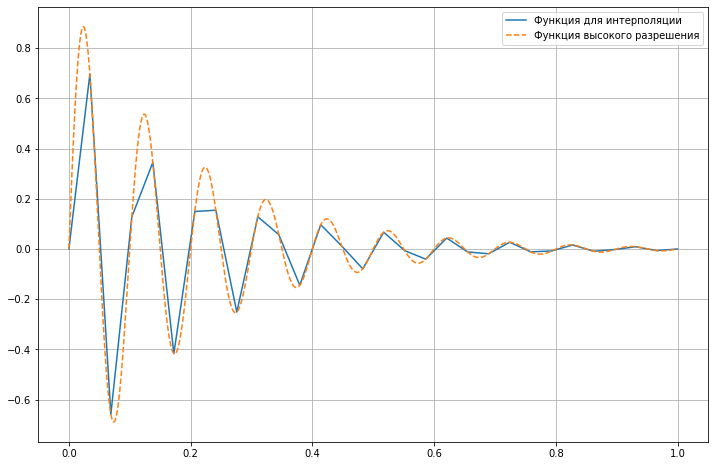

In [2]:
w1 = 10    
a1 = 1     
Fs = 30 
Ts = 1.0/Fs
alpha = 5

## исходная ось (низкое разрешение)
t = np.linspace(0, 1, Fs)
## функция для интерполяции
y = a1*np.exp(-alpha*t) * np.sin(2*np.pi*w1*t) 
 

## интерполяционная сетка (высокое разрешение)
tt = np.linspace(0, 1, 100*Fs)
## функция высокого разрешения (пытаемся получить её интерполяцией)
y_high_res = a1*np.exp(-alpha*tt) * np.sin(2*np.pi*w1*tt) 

f, ax = plt.subplots(figsize=(12, 8))
ax.plot(t, y)
ax.plot(tt, y_high_res, '--')
ax.legend(['Функция для интерполяции', 'Функция высокого разрешения'])
ax.grid()
plt.show()

Задания

8.8.1

In [70]:
y_interp = interpolate.interp1d(t, y, 'cubic')

In [71]:
y__ = y_interp(tt)

In [72]:
y__

array([ 0.00000000e+00,  3.60332381e-02,  7.13069526e-02, ...,
       -7.61536426e-04, -3.84935998e-04, -1.65032105e-17])

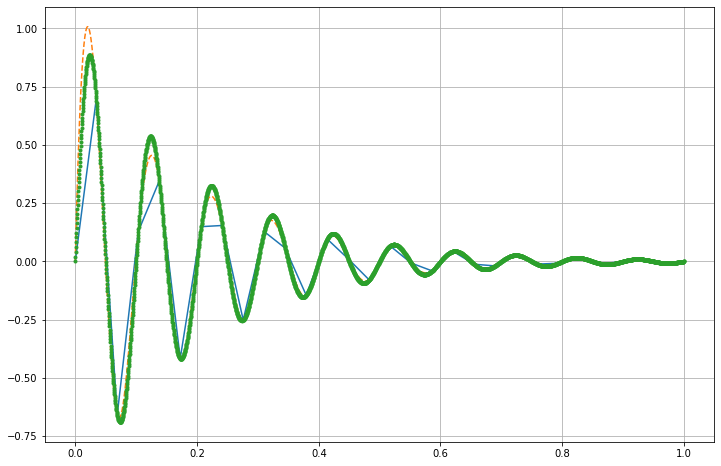

In [80]:
f, ax = plt.subplots(figsize=(12, 8))
ax.plot(t, y)
ax.plot(tt, y__, '--')
ax.plot(tt, y_high_res, '.')
#ax.legend(['Функция для интерполяции', 'Функция высокого разрешения'])
ax.grid()
plt.show()

In [83]:
print(   ((y_high_res - y__)**2).sum() / (100*Fs)   )

0.0010529718919300142


In [78]:
len(y__) - 100*Fs

0

In [84]:
s = 0
for i in range(100*Fs):
    s += (y_high_res[i] - y__[i]) * (y_high_res[i] - y__[i])
s = s / (100*Fs)
s

0.0010529718919300112

In [82]:
1-s

0.052325297262989956

8.8.2

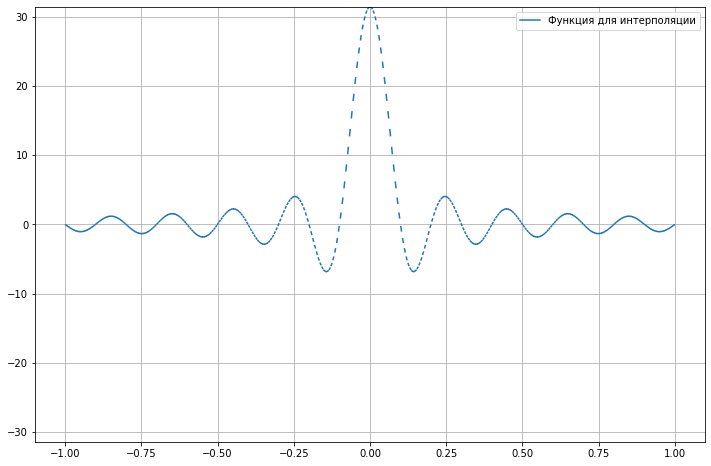

,t,y,y_lost
0,-1.000000,-1.224647e-15,NaN
1,-0.997998,-6.297937e-02,-0.062979
2,-0.995996,-1.259624e-01,-0.125962
3,-0.993994,-1.887000e-01,NaN
4,-0.991992,-2.509431e-01,-0.250943
5,-0.989990,-3.124436e-01,-0.312444
6,-0.987988,-3.729553e-01,NaN
7,-0.985986,-4.322350e-01,-0.432235
8,-0.983984,-4.900431e-01,-0.490043
9,-0.981982,-5.461451e-01,NaN


In [95]:
w1 = 5
a1 = 1     
Fs = 1000
Ts = 1.0/Fs
alpha = 5

df = pd.DataFrame()
## ось
df['t'] = np.linspace(-1, 1, Fs)
## функция для интерполяции
df['y'] = np.sin(2*np.pi*w1*df.t) / df.t 
 
## пропущенные значения    
df['y_lost'] = df.y
df.loc[0::3, 'y_lost'] = np.nan


f, ax = plt.subplots(figsize=(12, 8))
ax.plot(df.t, df.y_lost)
#ax.plot(df.t, df.y)
ax.set_ylim([-2*np.pi*w1, 2*np.pi*w1])
ax.legend(['Функция для интерполяции'])
ax.grid()
plt.show()

df.head(10)

In [96]:
df['y_nearest'] = df.y_lost.interpolate(method='nearest')

In [97]:
df.head(10)

,t,y,y_lost,y_nearest
0,-1.000000,-1.224647e-15,NaN,NaN
1,-0.997998,-6.297937e-02,-0.062979,-0.062979
2,-0.995996,-1.259624e-01,-0.125962,-0.125962
3,-0.993994,-1.887000e-01,NaN,-0.125962
4,-0.991992,-2.509431e-01,-0.250943,-0.250943
5,-0.989990,-3.124436e-01,-0.312444,-0.312444
6,-0.987988,-3.729553e-01,NaN,-0.312444
7,-0.985986,-4.322350e-01,-0.432235,-0.432235
8,-0.983984,-4.900431e-01,-0.490043,-0.490043
9,-0.981982,-5.461451e-01,NaN,-0.490043


In [98]:
df1 = df[~pd.isna(df.y_nearest)]

In [101]:
((df1.y-df1.y_nearest)**2).sum() / Fs

0.021001573630406476

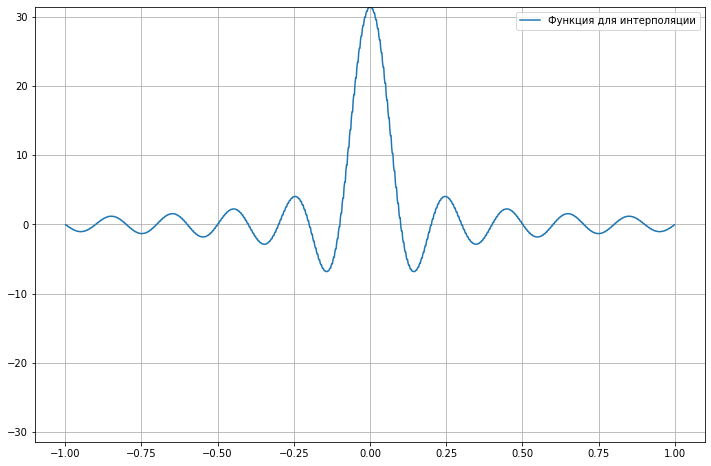

In [103]:
f, ax = plt.subplots(figsize=(12, 8))
ax.plot(df.t, df.y_nearest)
#ax.plot(df.t, df.y)
ax.set_ylim([-2*np.pi*w1, 2*np.pi*w1])
ax.legend(['Функция для интерполяции'])
ax.grid()
plt.show()

In [127]:
df['y_polynomial'] = df.y_lost.interpolate(method='polynomial', order=5)

In [128]:
df

,t,y,y_lost,y_nearest,y_spline,y_polynomial
0,-1.000000,-1.224647e-15,NaN,NaN,NaN,NaN
1,-0.997998,-6.297937e-02,-0.062979,-0.062979,-0.062979,-0.062979
2,-0.995996,-1.259624e-01,-0.125962,-0.125962,-0.125962,-0.125962
3,-0.993994,-1.887000e-01,NaN,-0.125962,-1.359573,-0.188700
4,-0.991992,-2.509431e-01,-0.250943,-0.250943,-0.250943,-0.250943
...,...,...,...,...,...,...
995,0.991992,-2.509431e-01,-0.250943,-0.250943,-0.250943,-0.250943
996,0.993994,-1.887000e-01,NaN,-0.250943,-1.229353,-0.188700
997,0.995996,-1.259624e-01,-0.125962,-0.125962,-0.125962,-0.125962
998,0.997998,-6.297937e-02,-0.062979,-0.062979,-0.062979,-0.062979


In [129]:
df1 = df[~pd.isna(df.y_polynomial)]

In [130]:
((df1.y-df1.y_polynomial)**2).sum() / Fs

1.3435351314882754e-18

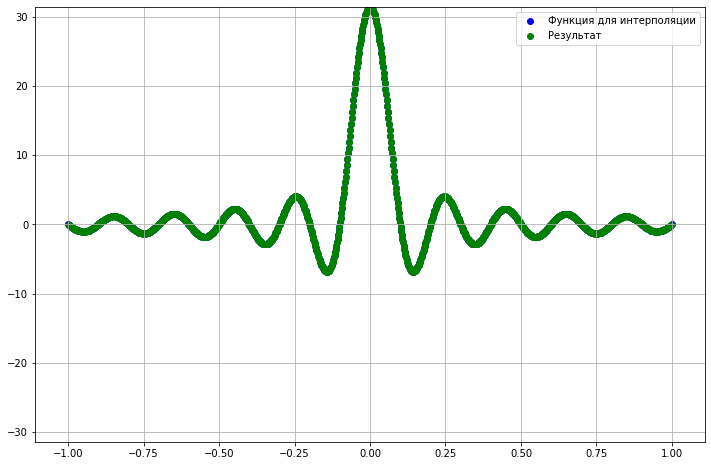

In [131]:
f, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df.t, df.y, c='b')
ax.scatter(df.t, df.y_polynomial, c='g')
ax.set_ylim([-2*np.pi*w1, 2*np.pi*w1])
ax.legend(['Функция для интерполяции', 'Результат'])
ax.grid()
plt.show()